# Univariate Regression

The goal is to predict a single scalar output $y \in \mathbb{R}$ from input $x$ using a model $f_\theta(x)$ with parameters $\theta$.

We select the univariate normal, which is defined over $y \in \mathbb{R}$. This distribution has two parameters (mean $\mu$ and variance $\sigma^2$).

$$
p(y|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(y-\mu)^2}{2\sigma^2}\right]
$$

We set the machine learning model to compute the mean.
$$
\mu = f_\theta(x)
$$

We choose a loss function based on the negative log-likelihood.
$$
\begin{align}
L(\theta) & = -\sum_{i=1}^{N}\log p(y_i|f_\theta(x_i), \sigma^2) \\
& = -\sum_{i=1}^{N}\log\left[ \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(y-f_\theta(x_i))^2}{2\sigma^2}\right] \right]
\end{align}
$$

When the train the model, we seek parameters $\hat{\theta}$ that minimize the loss.
$$
\begin{align}
\hat{\theta} & = \underset{\theta}{\mathrm{argmin}}\left[
  -\sum_{i=1}^{N}\log\left[ \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(y-f_\theta(x_i))^2}{2\sigma^2}\right] \right]
  \right] \\
& = \underset{\theta}{\mathrm{argmin}}\left[
  -\sum_{i=1}^{N}
  \left( \log \left[\frac{1}{\sqrt{2\pi\sigma^2}} \right]
  -\frac{(y-f_\theta(x_i))^2}{2\sigma^2} \right) \right]\\
& = \underset{\theta}{\mathrm{argmin}}\left[
  -\sum_{i=1}^{N}
  \left(
  -\frac{(y-f_\theta(x_i))^2}{2\sigma^2} \right) \right]\\
& = \underset{\theta}{\mathrm{argmin}}\left[
  \sum_{i=1}^{N} (y-f_\theta(x_i))^2 \right]\\
\end{align}
$$

Therefore, we have a **least squares loss** function.

$$
L(\theta) = \sum_{i=1}^{N} (y_i-f_\theta(x_i))^2
$$


When we perform inference, we usually want a single "best" point estimate $\hat{y}$, so we take the maximum of the predicted distribution:

$$
\hat{y} = \underset{\theta}{\mathrm{argmax}} \; p(y|f_{\hat{\theta}}(x), \sigma^2)
$$

For the univariate normal, the maximum position is determined by the mean parameter $\mu$. This is precisely what the model computed, so

$$
\hat{y} = f_{\hat{\theta}}(x)
$$

## Mean squared error (MSE)

$$
\text{MSE}(a,b) = \frac{1}{N}\sum_i^N(a_i - b_i)^2
$$

In [ ]:
import torch
from torch import nn

In [ ]:
mse = nn.MSELoss()
a = torch.tensor([1.0, 7.0])
b = torch.tensor([4.0, 2.0])
mse(a, b)

tensor(17.)

## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

## Data

In [ ]:
# Data
# y = 2x + 5
N = 100
x = torch.linspace(-10, 10, N).view(-1, 1)  #(N, 1)
x.shape

torch.Size([100, 1])

In [ ]:
noise = torch.randn_like(x) * 2
y = 2*x + 5 + noise
y.shape

torch.Size([100, 1])

In [ ]:
def y_true(x):
  return 2*x + 5

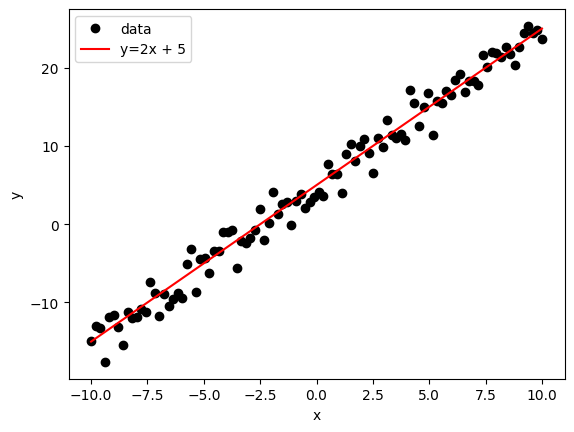

In [ ]:
plt.figure()
plt.plot(x, y, 'o', label='data', color='black')
plt.plot(x, y_true(x), '-', label='y=2x + 5', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Dataset, DataLoader

In [ ]:
class RegressionDataset(Dataset):
    def __init__(self, N=100):
        x = torch.linspace(-10, 10, N).view(-1, 1)
        noise = torch.randn_like(x) * 2
        y = 2*x + 5 + noise
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [ ]:
dataset = RegressionDataset()
len(dataset)

100

In [ ]:
sample = dataset[0]
sample

(tensor([-10.]), tensor([-17.1652]))

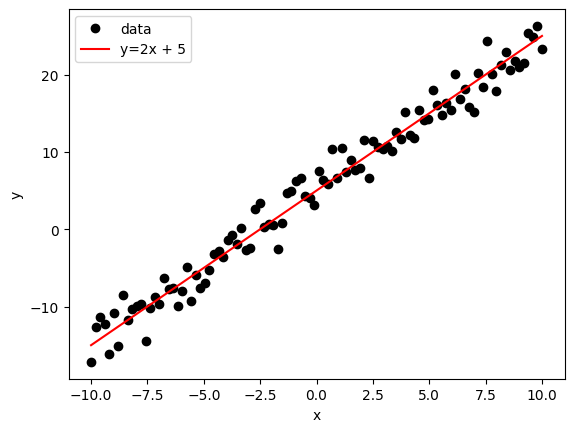

In [ ]:
plt.figure()
plt.plot(dataset.x, dataset.y, 'o', label='data', color='black')
plt.plot(dataset.x, y_true(dataset.x), '-', label='y=2x + 5', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=False)

In [ ]:
for batch in dataloader:
  batch
  break
print(type(batch))
batch

<class 'list'>


[tensor([[-10.0000],
         [ -9.7980]]),
 tensor([[-17.1652],
         [-12.7050]])]

In [ ]:
batch = next(iter(dataloader))
batch

[tensor([[-10.0000],
         [ -9.7980]]),
 tensor([[-17.1652],
         [-12.7050]])]

In [ ]:
dataset[0]

(tensor([-10.]), tensor([-17.1652]))

In [ ]:
dataset[1]

(tensor([-9.7980]), tensor([-12.7050]))

## torch.nn

In [ ]:
layer = nn.Linear(1, 3)
layer

Linear(in_features=1, out_features=3, bias=True)

In [ ]:
inputs = batch[0]
print(inputs)
inputs.shape  # (batch_size, 1)

tensor([[-10.0000],
        [ -9.7980]])


torch.Size([2, 1])

In [ ]:
outputs = layer(inputs)
print(outputs)
outputs.shape  # (batch_size, out_features)

tensor([[-0.8061,  8.8671,  0.4780],
        [-0.7953,  8.6985,  0.4694]], grad_fn=<AddmmBackward0>)


torch.Size([2, 3])

In [ ]:
params = []
for p in layer.parameters():
  print(p, end='\n\n')
  params.append(p.data)

Parameter containing:
tensor([[ 0.0535],
        [-0.8346],
        [-0.0422]], requires_grad=True)

Parameter containing:
tensor([-0.2709,  0.5206,  0.0557], requires_grad=True)



In [ ]:
A = params[0]  # weight
A.shape

torch.Size([3, 1])

In [ ]:
b = params[1]  # bias
b.shape

torch.Size([3])

### nn.Linear

https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

$$
y = x A^T + b
$$

- $x$: Input $(N, d_\text{in})$
- $A$: Weight matrix $(d_\text{out}, d_\text{in})$
  - $A^T$: Transpose of $A$ $(d_\text{in}, d_\text{out})$
- $b$: Bias $(d_\text{out})$

$$
(N, d_\text{in}) \times (d_\text{in}, d_\text{out}) + (d_\text{out}) \rightarrow (N, d_\text{out})
$$

In [ ]:
# (N, d_out)
intermediate = inputs @ A.T
print(intermediate)
intermediate.shape

tensor([[-0.5352,  8.3465,  0.4223],
        [-0.5244,  8.1779,  0.4138]])


torch.Size([2, 3])

In [ ]:
print(b)
print(b.shape)

tensor([-0.2709,  0.5206,  0.0557])
torch.Size([3])


In [ ]:
print(intermediate[0, :])
print(intermediate[0, :] + b)

tensor([-0.5352,  8.3465,  0.4223])
tensor([-0.8061,  8.8671,  0.4780])


In [ ]:
print(intermediate[1, :])
print(intermediate[1, :] + b)

tensor([-0.5244,  8.1779,  0.4138])
tensor([-0.7953,  8.6985,  0.4694])


In [ ]:
print(outputs)

tensor([[-0.8061,  8.8671,  0.4780],
        [-0.7953,  8.6985,  0.4694]], grad_fn=<AddmmBackward0>)


## Broadcasting

https://numpy.org/doc/stable/user/basics.broadcasting.html

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations. There are, however, cases where broadcasting is a bad idea because it leads to inefficient use of memory that slows computation.

#### General broadcasting rules
When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimension and works its way left. Two dimensions are compatible when

- they are equal, or

- one of them is 1.

If these conditions are not met, a `ValueError: operands could not be broadcast together` exception is thrown, indicating that the arrays have incompatible shapes.

Input arrays do not need to have the same number of dimensions. The resulting array will have the same number of dimensions as the input array with the greatest number of dimensions, where the size of each dimension is the largest size of the corresponding dimension among the input arrays. **Note that missing dimensions are assumed to have size one**.

In [ ]:
# broadcasting
# (N, d_out) + (d_out) =>
# (N, d_out) + (1, d_out) =>
# (N, d_out) + (N, d_out) =>
# (N, d_out)
intermediate = inputs @ A.T
print(intermediate.shape)
print(b.shape)
output_manual = intermediate + b
print(output_manual.shape)

torch.Size([2, 3])
torch.Size([3])
torch.Size([2, 3])


In [ ]:
print(inputs @ A.T + b)
print()
print(layer(inputs))

tensor([[-0.8061,  8.8671,  0.4780],
        [-0.7953,  8.6985,  0.4694]])

tensor([[-0.8061,  8.8671,  0.4780],
        [-0.7953,  8.6985,  0.4694]], grad_fn=<AddmmBackward0>)


## Model

In [ ]:
# Define Model
class RegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Linear(1, 1)

    def forward(self, x):
        return self.model(x)

In [ ]:
inputs

tensor([[-10.0000],
        [ -9.7980]])

In [ ]:
model = RegressionModel()
model(inputs)

tensor([[6.2642],
        [6.1460]], grad_fn=<AddmmBackward0>)

In [ ]:
params = []
for p in model.parameters():
  print(p)
  params.append(p.data)

Parameter containing:
tensor([[-0.5854]], requires_grad=True)
Parameter containing:
tensor([0.4098], requires_grad=True)


In [ ]:
# y = x A^T + b
inputs @ params[0].T + params[1]

tensor([[6.2642],
        [6.1460]])

## device

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
try:
    model = RegressionModel()
    model.to(device)
    model(inputs)
except Exception as e:
    print(e)

Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)


In [ ]:
model = RegressionModel()
model = model.to(device)
inputs = inputs.to(device)
model(inputs)

tensor([[7.1329],
        [6.9893]], device='cuda:0', grad_fn=<AddmmBackward0>)

## Training

In [ ]:
# Initialize model, loss function(criterion), optimizer
model = RegressionModel()
model = model.to(device)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 200
losses = []
for epoch in range(num_epochs):
    train_loss = 0.0
    for batch in dataloader:
        x, y = batch
        x, y = x.to(device), y.to(device)

        # Foward propagation
        predictions = model(x)
        loss = criterion(predictions, y)

        # Backpropagation and update weights & biases
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Save loss
        train_loss += loss.item()

    train_loss /= len(dataloader)
    losses.append(train_loss)

    if epoch % 10 == 0 or epoch == num_epochs - 1:
        print(f"Epoch [{epoch:3d}], Loss: {train_loss:.4f}")

Epoch [  0], Loss: 70.9024
Epoch [ 10], Loss: 28.2229
Epoch [ 20], Loss: 23.7978
Epoch [ 30], Loss: 20.1184
Epoch [ 40], Loss: 17.1044
Epoch [ 50], Loss: 14.6375
Epoch [ 60], Loss: 12.6185
Epoch [ 70], Loss: 10.9660
Epoch [ 80], Loss: 9.6134
Epoch [ 90], Loss: 8.5064
Epoch [100], Loss: 7.6004
Epoch [110], Loss: 6.8588
Epoch [120], Loss: 6.2518
Epoch [130], Loss: 5.7550
Epoch [140], Loss: 5.3483
Epoch [150], Loss: 5.0154
Epoch [160], Loss: 4.7429
Epoch [170], Loss: 4.5198
Epoch [180], Loss: 4.3372
Epoch [190], Loss: 4.1878
Epoch [199], Loss: 4.0766


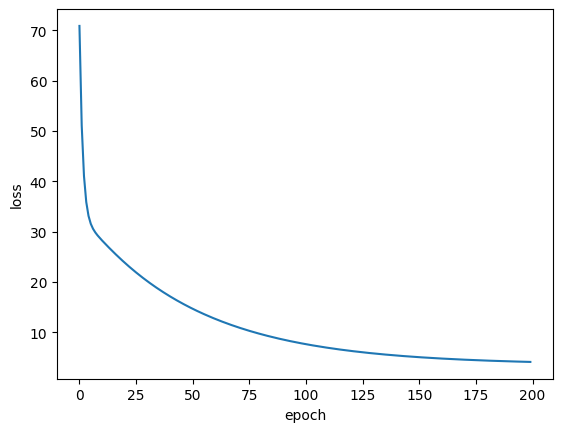

In [ ]:
plt.figure()
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## Inference

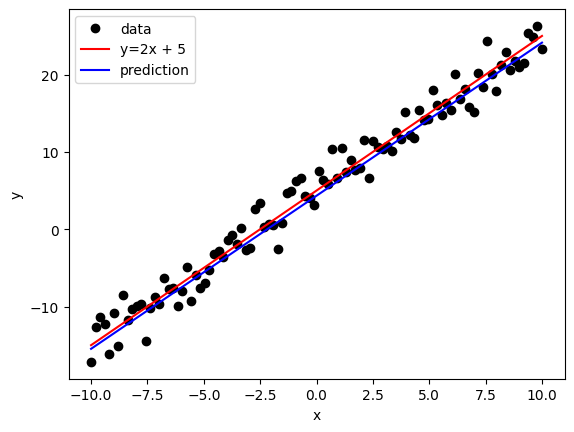

In [ ]:
# with torch.no_grad():
with torch.inference_mode():
    y_pred = model(dataset.x.to(device)).detach().cpu()

plt.figure()
plt.plot(dataset.x, dataset.y, 'o', label='data', color='black')
plt.plot(dataset.x, y_true(dataset.x), '-', label='y=2x + 5', color='red')
plt.plot(dataset.x, y_pred, '-', label='prediction', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
params = []
for p in model.parameters():
  print(p)
  params.append(p.data)

Parameter containing:
tensor([[1.9802]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([4.3314], device='cuda:0', requires_grad=True)


In [ ]:
y_pred_manual = dataset.x.to(device) @ params[0].T + params[1]
y_pred_manual = y_pred_manual.detach().cpu()
torch.allclose(y_pred, y_pred_manual)

True

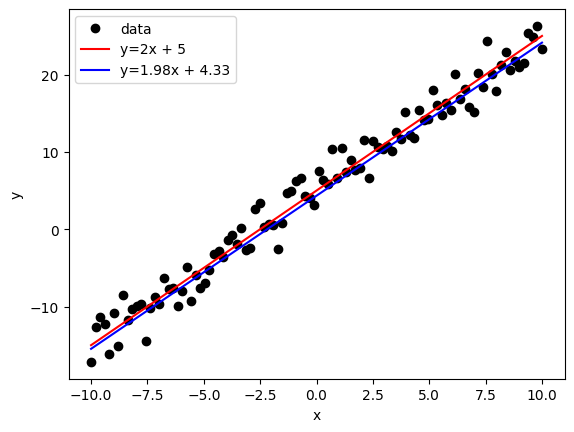

In [ ]:
if params[1].item() > 0:
  label = f'y={params[0].item():.2f}x + {params[1].item():.2f}'
else:
  label = f'y={params[0].item():.2f}x - {abs(params[1].item()):.2f}'

plt.figure()
plt.plot(dataset.x, dataset.y, 'o', label='data', color='black')
plt.plot(dataset.x, y_true(dataset.x), '-', label='y=2x + 5', color='red')
plt.plot(dataset.x, y_pred, '-', label=label, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Summary

Epoch [  0], Loss: 188.5781
Epoch [ 10], Loss: 27.9882
Epoch [ 20], Loss: 23.4700
Epoch [ 30], Loss: 19.9016
Epoch [ 40], Loss: 16.9625
Epoch [ 50], Loss: 14.5705
Epoch [ 60], Loss: 12.6050
Epoch [ 70], Loss: 10.9919
Epoch [ 80], Loss: 9.6814
Epoch [ 90], Loss: 8.6010
Epoch [100], Loss: 7.7188
Epoch [110], Loss: 7.0081
Epoch [120], Loss: 6.4083
Epoch [130], Loss: 5.9270
Epoch [140], Loss: 5.5371
Epoch [150], Loss: 5.2108
Epoch [160], Loss: 4.9462
Epoch [170], Loss: 4.7284
Epoch [180], Loss: 4.5523
Epoch [190], Loss: 4.4077
Epoch [199], Loss: 4.3015


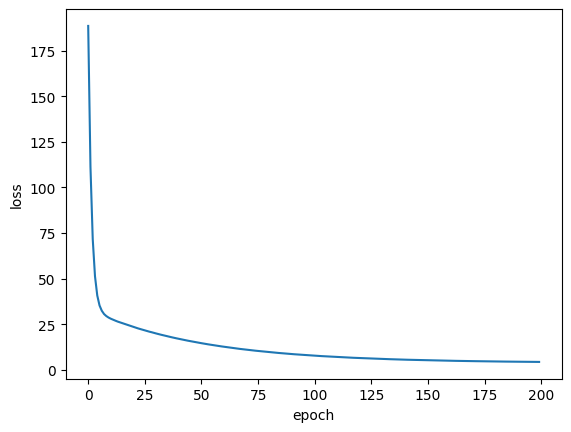

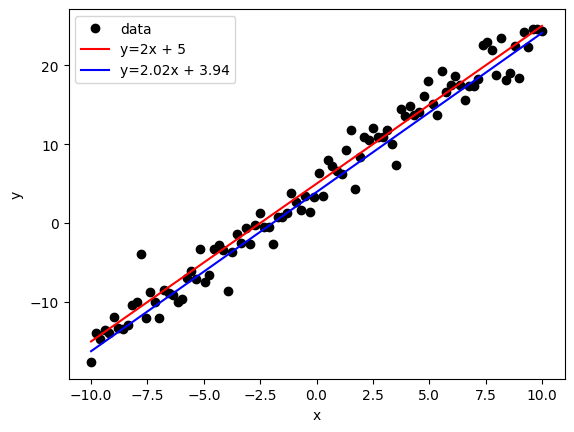

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Define Dataset
class RegressionDataset(Dataset):
    def __init__(self, N=100):
        x = torch.linspace(-10, 10, N).view(-1, 1)
        noise = torch.randn_like(x) * 2
        y = 2*x + 5 + noise
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

# Define Model
class RegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Linear(1, 1)

    def forward(self, x):
        return self.model(x)

# Dataset, DataLoader
dataset = RegressionDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Model, Optimizer, Criterion
model = RegressionModel()
optimizer = optim.SGD(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()

# Training loop
num_epochs = 200
losses = []
for epoch in range(num_epochs):
    train_loss = 0.0
    for batch in dataloader:
        x, y = batch

        # Foward propagation
        predictions = model(x)
        loss = criterion(predictions, y)

        # Backpropagation and update weights & biases
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Save loss
        train_loss += loss.item()

    train_loss /= len(dataloader)
    losses.append(train_loss)

    if epoch % 10 == 0 or epoch == num_epochs - 1:
        print(f"Epoch [{epoch:3d}], Loss: {train_loss:.4f}")

# Loss curve
plt.figure()
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# Inference
def get_label(model):
    params = []
    for p in model.parameters():
        params.append(p.data)
    if params[1].item() > 0:
      label = f'y={params[0].item():.2f}x + {params[1].item():.2f}'
    else:
      label = f'y={params[0].item():.2f}x - {abs(params[1].item()):.2f}'
    return label

with torch.inference_mode():
    y_pred = model(dataset.x)

label = get_label(model)

plt.figure()
plt.plot(dataset.x, dataset.y, 'o', label='data', color='black')
plt.plot(dataset.x, y_true(dataset.x), '-', label='y=2x + 5', color='red')
plt.plot(dataset.x, y_pred, '-', label=label, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()